In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# computer vision library
import cv2

# glob
from glob import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# extract path of male and female in crop_data folder and put them in a list
happypath = glob('./crop_data/happy/*.jpg')
sadpath = glob('./crop_data/sad/*.jpg')
angrypath = glob('./crop_data/angry/*.jpg')
#confusedpath = glob('./crop_data/confused/*.jpg'

In [4]:
df_happy = pd.DataFrame(happypath,columns=['filepath'])
df_happy['expression'] = 'happy'

df_sad = pd.DataFrame(sadpath,columns=['filepath'])
df_sad['expression'] = 'sad'

df_angry = pd.DataFrame(angrypath,columns=['filepath'])
df_angry['expression'] = 'angry'

#df_confused = pd.DataFrame(confusedpath,columns=['filepath'])
#df_confused['expression'] = 'confused'

df = pd.concat((df_happy,df_sad, df_angry),axis=0)

df.head()

,filepath,expression
0,./crop_data/happy\happy_0.jpg,happy
1,./crop_data/happy\happy_1.jpg,happy
2,./crop_data/happy\happy_100.jpg,happy
3,./crop_data/happy\happy_102.jpg,happy
4,./crop_data/happy\happy_105.jpg,happy


In [5]:
df.tail()

,filepath,expression
369,./crop_data/angry\angry_9.jpg,angry
370,./crop_data/angry\angry_90.jpg,angry
371,./crop_data/angry\angry_94.jpg,angry
372,./crop_data/angry\angry_97.jpg,angry
373,./crop_data/angry\angry_98.jpg,angry


In [6]:
df.shape

(993, 2)

In [7]:
# it will take each image path
# then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [8]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this columns

In [9]:
df.head()

,filepath,expression,dimension
0,./crop_data/happy\happy_0.jpg,happy,1384
1,./crop_data/happy\happy_1.jpg,happy,615
2,./crop_data/happy\happy_100.jpg,happy,273
3,./crop_data/happy\happy_102.jpg,happy,182
4,./crop_data/happy\happy_105.jpg,happy,54


In [13]:
dist_expression = df['expression'].value_counts()
dist_expression

expression
happy    389
angry    374
sad      230
Name: count, dtype: int64

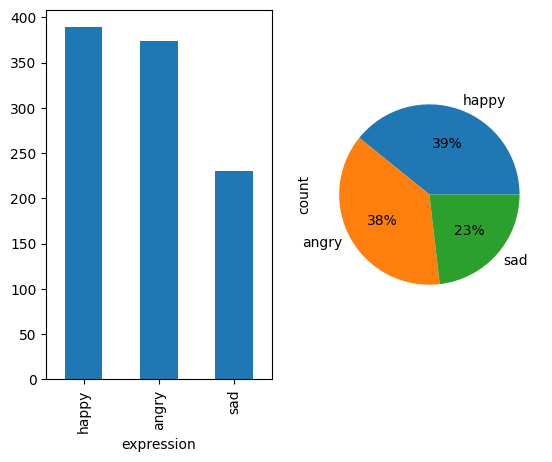

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2)
dist_expression.plot(kind='bar',ax=ax[0])
dist_expression.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()

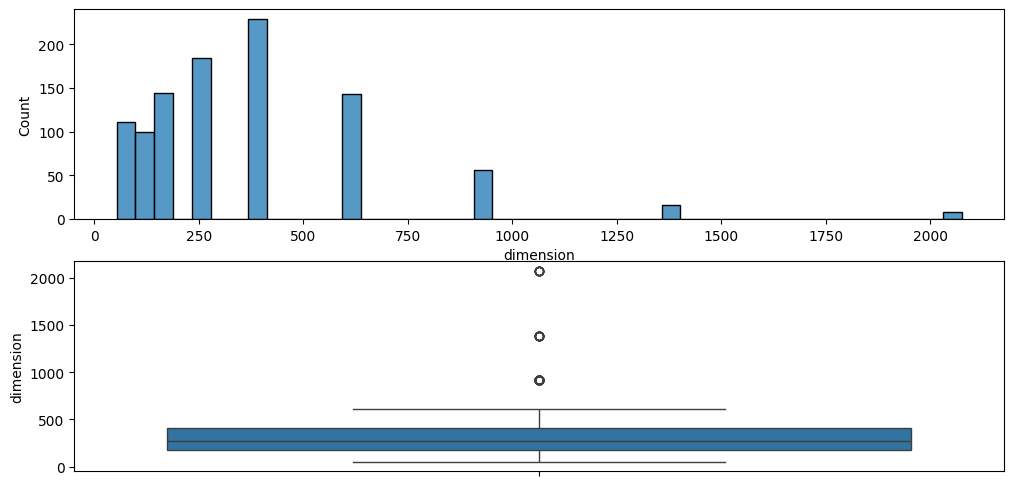

In [15]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by “Gender”
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(df['dimension'])
plt.show()

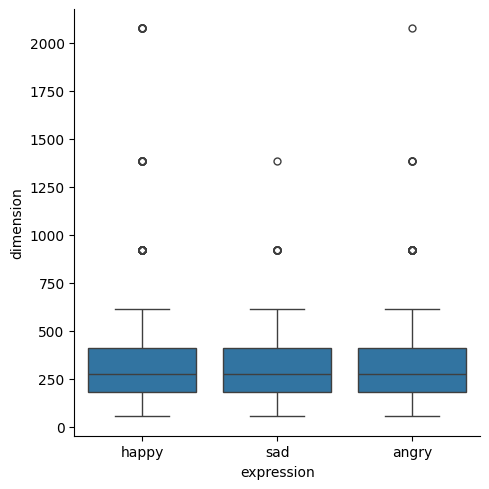

In [16]:
sns.catplot(data=df,x='expression',y='dimension',kind='box')

In [17]:
df_filter = df.query('dimension > 60')
df_filter.shape

(947, 3)

In [18]:
df_filter['expression'].value_counts(normalize=True)

expression
happy    0.390707
angry    0.383316
sad      0.225977
Name: proportion, dtype: float64

#### Structure the image 
- 100 x 100

In [19]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step -3: resize into 100 x 100 array   

        size = gray.shape[0]
        if size >= 100:
            # cv2.INTER_AREA (SHINK)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            # cv2.INTER_CUBIC (ENLARGE)
            gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

        # step -4: Flatten Image (1x10,000)
        flatten_image = gray_resize.flatten()
        return flatten_image
    
    except:
        return None

In [20]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images into 100 x 100
df_filter.head()

,filepath,expression,dimension,data
0,./crop_data/happy\happy_0.jpg,happy,1384,"[8, 20, 22, 11, 67, 49, 44, 57, 79, 56, 54, 48..."
1,./crop_data/happy\happy_1.jpg,happy,615,"[145, 144, 145, 143, 143, 141, 133, 124, 67, 4..."
2,./crop_data/happy\happy_100.jpg,happy,273,"[26, 6, 14, 11, 14, 12, 19, 20, 19, 32, 40, 48..."
3,./crop_data/happy\happy_102.jpg,happy,182,"[51, 46, 52, 41, 38, 35, 37, 42, 36, 37, 42, 3..."
5,./crop_data/happy\happy_106.jpg,happy,273,"[171, 169, 172, 173, 176, 180, 153, 134, 66, 6..."


In [21]:
data = df_filter['data'].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,8,20,22,11,67,49,44,57,79,56,...,173,165,158,149,144,154,161,152,148,148
1,145,144,145,143,143,141,133,124,67,42,...,23,6,5,6,10,19,28,19,20,22
2,26,6,14,11,14,12,19,20,19,32,...,210,211,212,212,212,213,210,211,210,206
3,51,46,52,41,38,35,37,42,36,37,...,86,105,119,125,154,160,173,166,178,172
5,171,169,172,173,176,180,153,134,66,66,...,209,211,211,212,213,214,212,208,205,208


#### Data Normalization

In [22]:
# since for 8 bit image max value is 255 
# therefore we are dividing each and every pixel with 255
data = data/255.0 
data['expression'] = df_filter['expression']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,expression
0,0.031373,0.078431,0.086275,0.043137,0.262745,0.192157,0.172549,0.223529,0.309804,0.219608,...,0.647059,0.619608,0.584314,0.564706,0.603922,0.631373,0.596078,0.580392,0.580392,happy
1,0.568627,0.564706,0.568627,0.560784,0.560784,0.552941,0.521569,0.486275,0.262745,0.164706,...,0.023529,0.019608,0.023529,0.039216,0.074510,0.109804,0.074510,0.078431,0.086275,happy
2,0.101961,0.023529,0.054902,0.043137,0.054902,0.047059,0.074510,0.078431,0.074510,0.125490,...,0.827451,0.831373,0.831373,0.831373,0.835294,0.823529,0.827451,0.823529,0.807843,happy
3,0.200000,0.180392,0.203922,0.160784,0.149020,0.137255,0.145098,0.164706,0.141176,0.145098,...,0.411765,0.466667,0.490196,0.603922,0.627451,0.678431,0.650980,0.698039,0.674510,happy
5,0.670588,0.662745,0.674510,0.678431,0.690196,0.705882,0.600000,0.525490,0.258824,0.258824,...,0.827451,0.827451,0.831373,0.835294,0.839216,0.831373,0.815686,0.803922,0.815686,happy


In [23]:
###
data.isnull().sum().sum()

0

In [24]:
## remove the missing values
data.dropna(inplace=True)

In [25]:
data.shape

(947, 10001)

**Save the data** for future study

In [26]:
import pickle

In [27]:
pickle.dump(data,open('./data/expression_data_images_100_100.pickle',mode='wb'))

---
### END